In [5]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

%cd '/home/naodell/work/wbr/analysis'
np.set_printoptions(precision=3)
matplotlib.style.use('default')
params = {'legend.fontsize': 20,
          'axes.labelsize': 20,
          'figure.figsize': (8, 8),
          'axes.facecolor': 'white',
          'axes.titlesize':'x-large',
          'xtick.labelsize':18,
          'ytick.labelsize':18,
         }
matplotlib.rcParams.update(params)
%matplotlib inline
%connect_info

/home/naodell/work/wbr/analysis
{
  "shell_port": 38473,
  "iopub_port": 33919,
  "stdin_port": 41257,
  "control_port": 32907,
  "hb_port": 34161,
  "ip": "127.0.0.1",
  "key": "adc95316-0df5be6d26a8ff0638bb950b",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-3da8fde0-f42c-4481-a50f-b28e0a4f8e86.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.


In [6]:
# get the data
param_data_asimov = pd.read_csv('data/model_parameters_asimov.csv').set_index('name').iloc[4:]
param_data = pd.read_csv('data/model_parameters_unblinded.csv').set_index('name').iloc[4:]
param_impacts = pd.read_csv('local_data/impacts_unblinded.csv', index_col=0)
#param_impacts_asimov = pd.read_csv('local_data/impacts_asimov.csv', index_col=0)

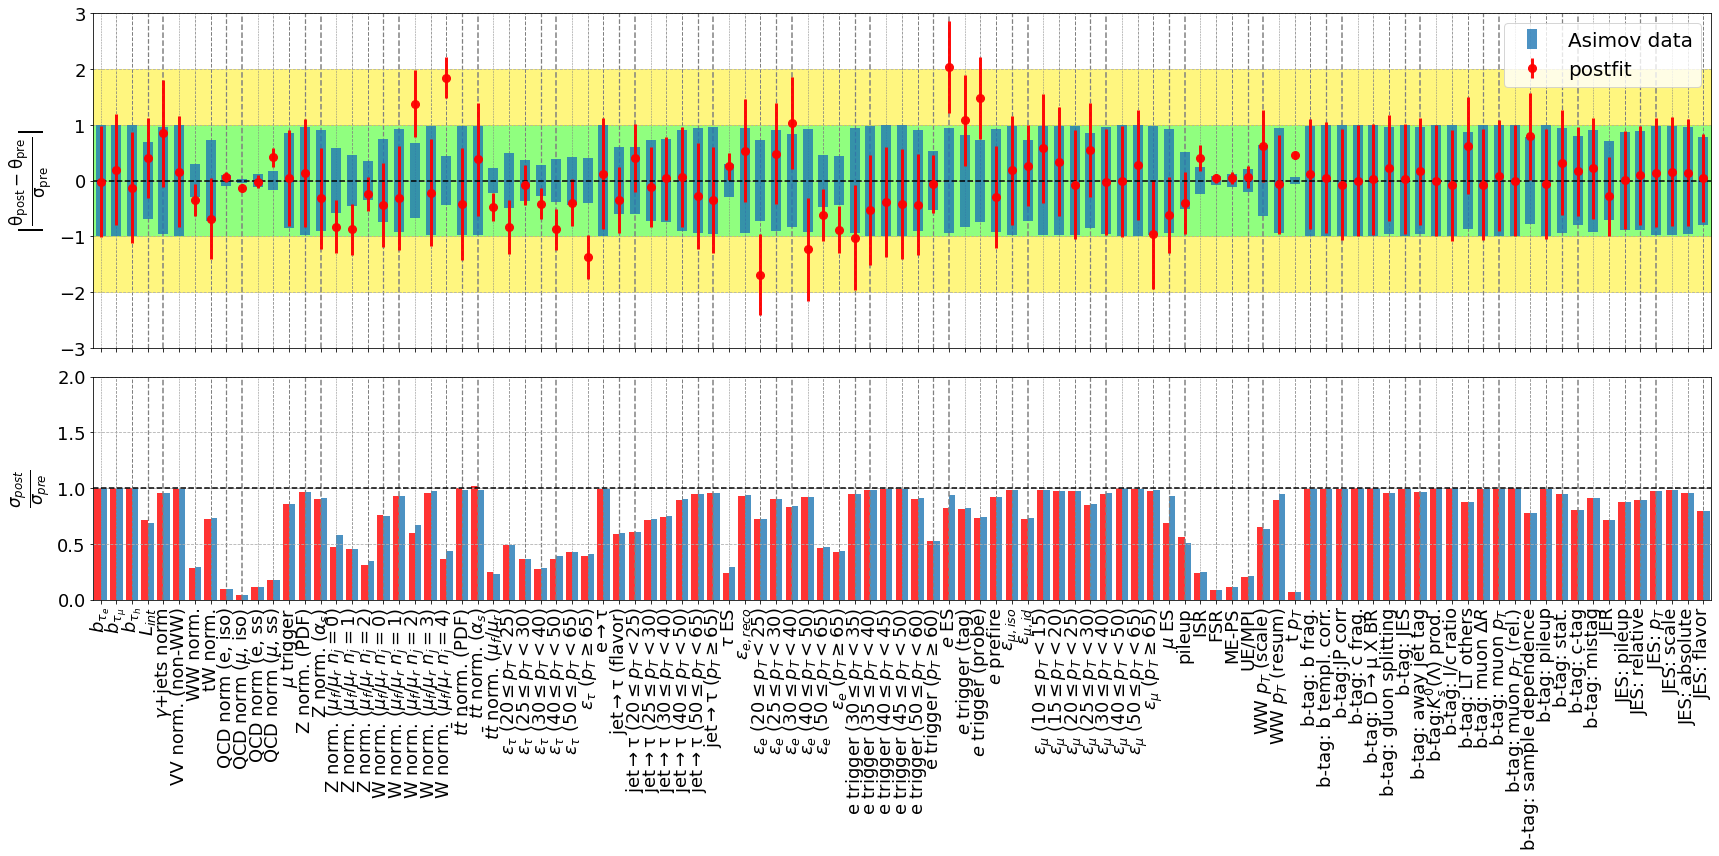

In [9]:
# summary pulls
fig, axes = plt.subplots(2, 1, figsize=(24, 12), facecolor='white', gridspec_kw={'height_ratios':[3, 2]}, sharex=True)

# get the pulls from the fits to data and the Asimov dataset
summary_data = param_data.query('active == 1')
params_pre  = summary_data['val_init']
stderr_pre  = summary_data['err_init']
params_post = summary_data['val_fit']
stderr_post = summary_data['err_fit']
constraints = summary_data['ratio']
pulls = (params_post - params_pre)/stderr_pre

summary_data_asimov = param_data_asimov.query('active == 1')
params_pre_asimov  = summary_data_asimov['val_init']
stderr_pre_asimov  = summary_data_asimov['err_init']
params_post_asimov = summary_data_asimov['val_fit']
stderr_post_asimov = summary_data_asimov['err_fit']
constraints_asimov = summary_data_asimov['ratio']
pulls_asimov = (params_post_asimov - params_pre_asimov)/stderr_pre_asimov

#impacts = param_impacts.loc[list(summary_data.index)]

#ymax, ymin = 1.05*np.max(impacts.max()), 1.05*np.min(impacts.min())
p_labels = summary_data.label
nparams = len(pulls)
xticks = np.arange(1, nparams+1, 1)

# plot pulls
ax = axes[0]
rerr_asimov = stderr_post_asimov/stderr_pre_asimov
#ax.errorbar(xticks, np.abs(pulls_asimov), yerr = rerr_asimov, 
ax.errorbar(xticks, pulls_asimov, yerr = rerr_asimov, 
            fmt = 'C0o',
            ecolor = 'C0',
            capsize = 0.,
            markersize = 0,
            elinewidth = 10.,
            alpha = 0.8,
            label = 'Asimov data'
           )
rerr = stderr_post/stderr_pre
#ax.errorbar(xticks, np.abs(pulls), yerr = rerr, 
ax.errorbar(xticks, pulls, yerr = rerr, 
            fmt = 'ro',
            ecolor = 'r',
            capsize = 0.,
            markersize = 8,
            elinewidth = 3.,
            alpha = 0.95,
            label = 'postfit'
           )
ax.legend()
#ax.fill_between([0, nparams+0.5], [-5, -5], [0, 0], edgecolor='k', facecolor = 'gray', hatch='/', alpha = 1.)

# plot error bands for nominal values
ax.plot([0, nparams+1], [0, 0], c='k', linestyle='--')
ax.fill_between([0, nparams+0.5], [-1, -1], [1, 1], color = '#22FF00', alpha = 0.5)
ax.fill_between([0, nparams+0.5], [1, 1], [2, 2], color = '#FFEE00', alpha = 0.5)
ax.fill_between([0, nparams+0.5], [-2, -2], [-1, -1], color = '#FFEE00', alpha = 0.5)

ax.set_ylim(-3, 3)
#ax.set_ylim(0, 3)
ax.set_xlim(0.5, nparams+0.5)
ax.set_ylabel(r'$\rm \left|\frac{\theta_{post} - \theta_{pre}}{\sigma_{pre}}\right|$', fontsize=24)
#ax.set_ylabel(r'$\rm \frac{\theta_{post} - \theta_{pre}}{\sigma_{pre}}$', fontsize=24)
ax.grid(linestyle='--')
ax.set_xticks(xticks)
for i, gl in enumerate(ax.get_xgridlines()):
    gl.set_color('gray')
    gl.set_linewidth(0.25*(i%5) + 0.5)

ax = axes[1]
ax.bar(xticks - 0.2, constraints, width=0.4, color='r', alpha=0.8)
ax.bar(xticks + 0.2, constraints_asimov, width=0.4, color='C0', alpha=0.8)
ax.plot([0, nparams+1], [1, 1], c='k', linestyle='--')
ax.set_ylabel(r'$\frac{\sigma_{post}}{\sigma_{pre}}$', fontsize=24)
ax.set_ylim(0, 2)
ax.set_xticks(xticks)
ax.set_xticklabels(p_labels)
ax.grid(linestyle='--')#, axis='y')
for i, gl in enumerate(ax.get_xgridlines()):
    gl.set_color('gray')
    gl.set_linewidth(0.25*(i%5) + 0.5)

plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)

plt.tight_layout()
plt.savefig(f'plots/systematics/asimov_pulls_summary.pdf')
plt.show()

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Index(['xs_gjets', 'xs_wjets_qcd_scale_0', 'xs_wjets_qcd_scale_1',\n       'xs_wjets_qcd_scale_2', 'xs_wjets_qcd_scale_3', 'xs_wjets_qcd_scale_4'],\n      dtype='object'). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

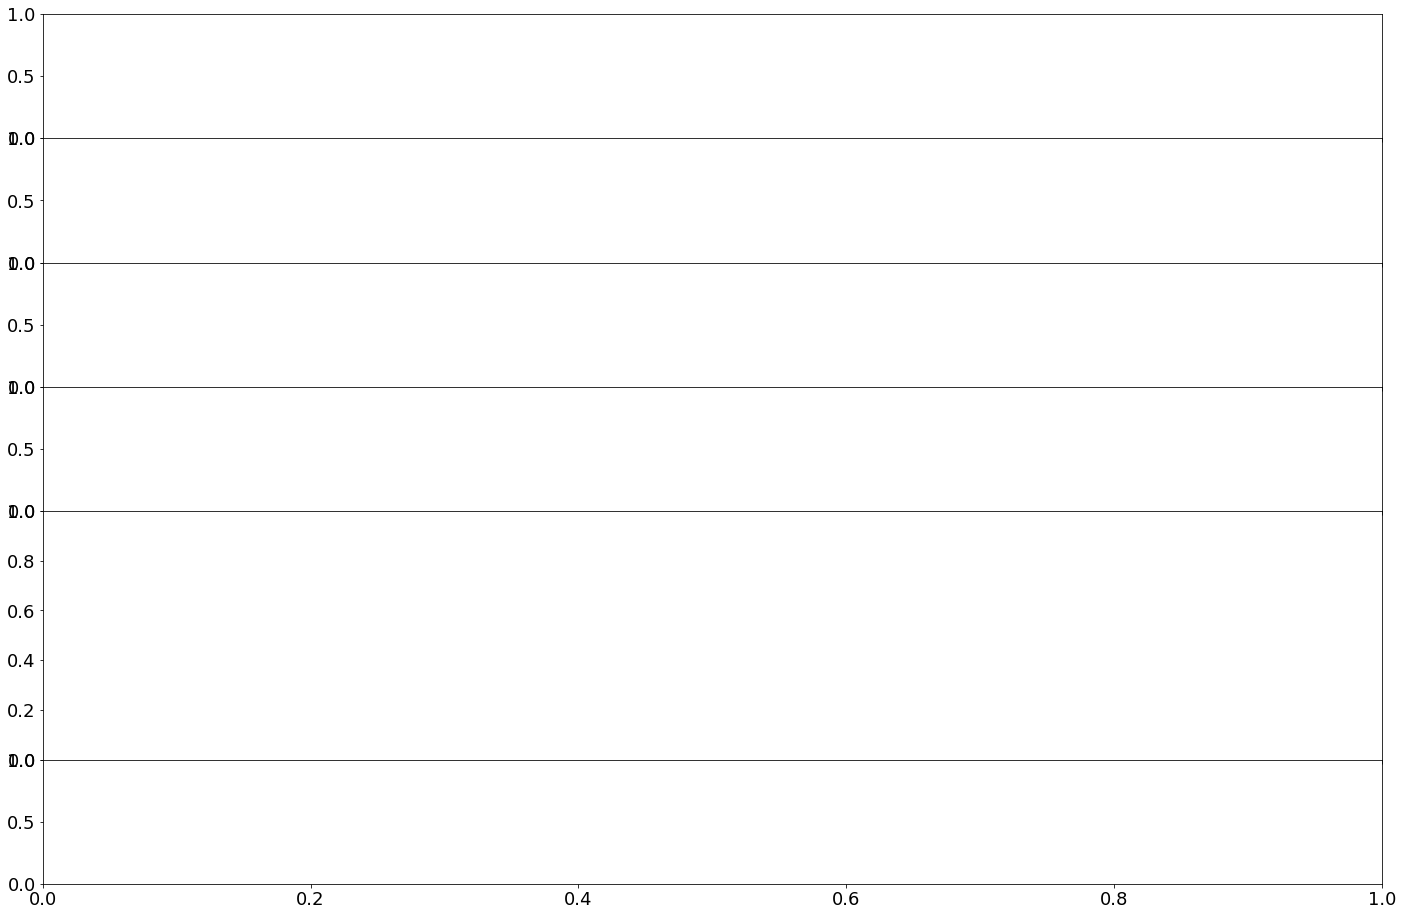

In [8]:
# pulls for normalization and miscellaneous params
fig, axes = plt.subplots(6, 1, figsize=(24, 16), facecolor='white', gridspec_kw={'height_ratios':[1, 1, 1, 1, 2, 1]}, sharex=True)
fig.subplots_adjust(hspace=0)

# get masked data for pulls
norm_data = param_data.query('(group == "norm" or group == "misc" or group == "tau_br") and active == 1')
params_pre  = norm_data['val_init']
stderr_pre  = norm_data['err_init']
params_post = norm_data['val_fit']
stderr_post = norm_data['err_fit']
constraints = norm_data['ratio']

pulls = (params_post - params_pre)/stderr_pre
nparams = len(pulls)
xticks = np.arange(1, nparams+1, 1)
p_labels = norm_data.label

impacts = param_impacts.loc[list(norm_data.index)]
ymax, ymin = 1.05*np.max(impacts.max()), 1.05*np.min(impacts.min())

#plot impacts
ax = axes[0]
ax.bar(xticks, impacts['beta_e_up'], color = 'C0', alpha = 0.9)
ax.bar(xticks, impacts['beta_e_down'], color = 'C3', alpha = 0.9)
ax.set_title('impacts')
ax.set_ylabel(r'$W\rightarrow e$')
ax.set_ylim(ymin, ymax)
ax.grid(linestyle='--', axis='y')

ax = axes[1]
ax.bar(xticks, impacts['beta_mu_up'], color = 'C0', alpha = 0.9)
ax.bar(xticks, impacts['beta_mu_down'], color = 'C3', alpha = 0.9)
ax.set_ylabel(r'$W\rightarrow \mu$')
ax.set_ylim(ymin, ymax)
ax.grid(linestyle='--', axis='y')

ax = axes[2]
ax.bar(xticks, impacts['beta_tau_up'], color = 'C0', alpha = 0.9)
ax.bar(xticks, impacts['beta_tau_down'], color = 'C3', alpha = 0.9)
ax.set_ylabel(r'$W\rightarrow \tau$')
ax.set_ylim(ymin, ymax)
ax.grid(linestyle='--', axis='y')

ax = axes[3]
ax.bar(xticks, impacts['beta_h_up'], color = 'C0', alpha = 0.9)
ax.bar(xticks, impacts['beta_h_down'], color = 'C3', alpha = 0.9)
ax.set_ylabel(r'$W\rightarrow h$')
ax.set_ylim(ymin, ymax)
ax.grid(linestyle='--', axis='y')


#ax.set_ylim(-3.5, 3.5)
#ax.set_xlim(0.5, nparams+0.5)
#ax.set_ylabel(r'$\rm \frac{\theta_{post} - \theta_{pre}}{\sigma_{pre}}$')
#ax.set_title('pulls (Asimov dataset)')
#ax.grid(linestyle='--', axis='y')

# plot pulls
rerr = stderr_post/stderr_pre
ax = axes[4]
ax.errorbar(xticks, pulls, yerr = rerr, 
            fmt = 'ko',
            ecolor = 'k',
            capsize = 0.,
            elinewidth = 2.,
            alpha = 0.9
           )

# plot error bands for nominal values
ax.plot([0, nparams+1], [0, 0], c='C0', linestyle='--')
ax.fill_between([0, nparams+0.5], [-1, -1], [1, 1], color = 'b', alpha = 0.25 )

ax.set_ylim(-5, 5)
ax.set_xlim(0.5, nparams+0.5)
ax.set_ylabel(r'$\rm \frac{\theta_{post} - \theta_{pre}}{\sigma_{pre}}$', fontsize=20)
ax.grid(linestyle='--', axis='y')
ax.set_title('pulls')

ax = axes[5]
ax.bar(xticks, constraints)
ax.plot([0, nparams+1], [1, 1], c='C3', linestyle='--')
ax.set_ylabel(r'$\frac{\sigma_{post}}{\sigma_{pre}}$', fontsize=20)
ax.set_xticks(xticks)
ax.set_xticklabels(p_labels)
ax.grid(linestyle='--', axis='y')

plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)

plt.tight_layout()
plt.savefig(f'plots/systematics/asimov_pulls_misc.pdf')
plt.show()

In [ ]:
# pulls for non-tau lepton reconstruction
fig, axes = plt.subplots(6, 1, figsize=(24, 16), facecolor='white', gridspec_kw={'height_ratios':[1, 1, 1, 1, 2, 1]}, sharex=True)
fig.subplots_adjust(hspace=0)

# get masked data for pulls
norm_data = param_data.query('(group == "reco_lepton") and active == 1')
params_pre  = norm_data['val_init']
stderr_pre  = norm_data['err_init']
params_post = norm_data['val_fit']
stderr_post = norm_data['err_fit']
constraints = norm_data['ratio']

pulls = (params_post - params_pre)/stderr_pre
nparams = len(pulls)
xticks = np.arange(1, nparams+1, 1)
p_labels = norm_data.label

impacts = param_impacts.loc[list(norm_data.index)]
ymax, ymin = 1.05*np.max(impacts.max()), 1.05*np.min(impacts.min())

#plot impacts
ax = axes[0]
ax.bar(xticks, impacts['beta_e_up'], color = 'C0', alpha = 0.9)
ax.bar(xticks, impacts['beta_e_down'], color = 'C3', alpha = 0.9)
ax.set_title('impacts')
ax.set_ylabel(r'$W\rightarrow e$')
ax.set_ylim(ymin, ymax)
ax.grid(linestyle='--', axis='y')

ax = axes[1]
ax.bar(xticks, impacts['beta_mu_up'], color = 'C0', alpha = 0.9)
ax.bar(xticks, impacts['beta_mu_down'], color = 'C3', alpha = 0.9)
ax.set_ylabel(r'$W\rightarrow \mu$')
ax.set_ylim(ymin, ymax)
ax.grid(linestyle='--', axis='y')

ax = axes[2]
ax.bar(xticks, impacts['beta_tau_up'], color = 'C0', alpha = 0.9)
ax.bar(xticks, impacts['beta_tau_down'], color = 'C3', alpha = 0.9)
ax.set_ylabel(r'$W\rightarrow \tau$')
ax.set_ylim(ymin, ymax)
ax.grid(linestyle='--', axis='y')

ax = axes[3]
ax.bar(xticks, impacts['beta_h_up'], color = 'C0', alpha = 0.9)
ax.bar(xticks, impacts['beta_h_down'], color = 'C3', alpha = 0.9)
ax.set_ylabel(r'$W\rightarrow h$')
ax.set_ylim(ymin, ymax)
ax.grid(linestyle='--', axis='y')


#ax.set_ylim(-3.5, 3.5)
#ax.set_xlim(0.5, nparams+0.5)
#ax.set_ylabel(r'$\rm \frac{\theta_{post} - \theta_{pre}}{\sigma_{pre}}$')
#ax.set_title('pulls (Asimov dataset)')
#ax.grid(linestyle='--', axis='y')

# plot pulls
rerr = stderr_post/stderr_pre
ax = axes[4]
ax.errorbar(xticks, pulls, yerr = rerr, 
            fmt = 'ko',
            ecolor = 'k',
            capsize = 0.,
            elinewidth = 2.,
            alpha = 0.9
           )

# plot error bands for nominal values
ax.plot([0, nparams+1], [0, 0], c='C0', linestyle='--')
ax.fill_between([0, nparams+0.5], [-1, -1], [1, 1], color = 'b', alpha = 0.25 )

ax.set_ylim(-3.5, 3.5)
ax.set_xlim(0.5, nparams+0.5)
ax.set_ylabel(r'$\rm \frac{\theta_{post} - \theta_{pre}}{\sigma_{pre}}$', fontsize=20)
ax.grid(linestyle='--', axis='y')
ax.set_title('pulls')

ax = axes[5]
ax.bar(xticks, constraints)
ax.plot([0, nparams+1], [1, 1], c='C3', linestyle='--')
ax.set_ylabel(r'$\frac{\sigma_{post}}{\sigma_{pre}}$', fontsize=20)
ax.set_xticks(xticks)
ax.set_xticklabels(p_labels)
ax.grid(linestyle='--', axis='y')

plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)

plt.tight_layout()
plt.savefig(f'plots/systematics/asimov_pulls_reco_lepton.pdf')
plt.show()

In [ ]:
# pulls for normalization and miscellaneous params
fig, axes = plt.subplots(6, 1, figsize=(24, 16), facecolor='white', gridspec_kw={'height_ratios':[1, 1, 1, 1, 2, 1]}, sharex=True)
fig.subplots_adjust(hspace=0)

# get masked data for pulls
norm_data = param_data.query('(group == "reco_tau") and active == 1')
params_pre  = norm_data['val_init']
stderr_pre  = norm_data['err_init']
params_post = norm_data['val_fit']
stderr_post = norm_data['err_fit']
constraints = norm_data['ratio']

pulls = (params_post - params_pre)/stderr_pre
nparams = len(pulls)
xticks = np.arange(1, nparams+1, 1)
p_labels = norm_data.label

impacts = param_impacts.loc[list(norm_data.index)]
ymax, ymin = 1.05*np.max(impacts.max()), 1.05*np.min(impacts.min())

#plot impacts
ax = axes[0]
ax.bar(xticks, impacts['beta_e_up'], color = 'C0', alpha = 0.9)
ax.bar(xticks, impacts['beta_e_down'], color = 'C3', alpha = 0.9)
ax.set_title('impacts')
ax.set_ylabel(r'$W\rightarrow e$')
ax.set_ylim(ymin, ymax)
ax.grid(linestyle='--', axis='y')

ax = axes[1]
ax.bar(xticks, impacts['beta_mu_up'], color = 'C0', alpha = 0.9)
ax.bar(xticks, impacts['beta_mu_down'], color = 'C3', alpha = 0.9)
ax.set_ylabel(r'$W\rightarrow \mu$')
ax.set_ylim(ymin, ymax)
ax.grid(linestyle='--', axis='y')

ax = axes[2]
ax.bar(xticks, impacts['beta_tau_up'], color = 'C0', alpha = 0.9)
ax.bar(xticks, impacts['beta_tau_down'], color = 'C3', alpha = 0.9)
ax.set_ylabel(r'$W\rightarrow \tau$')
ax.set_ylim(ymin, ymax)
ax.grid(linestyle='--', axis='y')

ax = axes[3]
ax.bar(xticks, impacts['beta_h_up'], color = 'C0', alpha = 0.9)
ax.bar(xticks, impacts['beta_h_down'], color = 'C3', alpha = 0.9)
ax.set_ylabel(r'$W\rightarrow h$')
ax.set_ylim(ymin, ymax)
ax.grid(linestyle='--', axis='y')


#ax.set_ylim(-3.5, 3.5)
#ax.set_xlim(0.5, nparams+0.5)
#ax.set_ylabel(r'$\rm \frac{\theta_{post} - \theta_{pre}}{\sigma_{pre}}$')
#ax.set_title('pulls (Asimov dataset)')
#ax.grid(linestyle='--', axis='y')

# plot pulls
rerr = stderr_post/stderr_pre
ax = axes[4]
ax.errorbar(xticks, pulls, yerr = rerr, 
            fmt = 'ko',
            ecolor = 'k',
            capsize = 0.,
            elinewidth = 2.,
            alpha = 0.9
           )

# plot error bands for nominal values
ax.plot([0, nparams+1], [0, 0], c='C0', linestyle='--')
ax.fill_between([0, nparams+0.5], [-1, -1], [1, 1], color = 'b', alpha = 0.25 )

ax.set_ylim(-3.5, 3.5)
ax.set_xlim(0.5, nparams+0.5)
ax.set_ylabel(r'$\rm \frac{\theta_{post} - \theta_{pre}}{\sigma_{pre}}$', fontsize=20)
ax.grid(linestyle='--', axis='y')
ax.set_title('pulls')

ax = axes[5]
ax.bar(xticks, constraints)
ax.plot([0, nparams+1], [1, 1], c='C3', linestyle='--')
ax.set_ylabel(r'$\frac{\sigma_{post}}{\sigma_{pre}}$', fontsize=20)
ax.set_xticks(xticks)
ax.set_xticklabels(p_labels)
ax.grid(linestyle='--', axis='y')

plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)

plt.tight_layout()
plt.savefig(f'plots/systematics/asimov_pulls_reco_tau.pdf')
plt.show()

In [ ]:
# pulls for normalization and miscellaneous params
fig, axes = plt.subplots(6, 1, figsize=(24, 16), facecolor='white', gridspec_kw={'height_ratios':[1, 1, 1, 1, 2, 1]}, sharex=True)
fig.subplots_adjust(hspace=0)

# get masked data for pulls
norm_data = param_data.query('(group == "jes") and active == 1')
params_pre  = norm_data['val_init']
stderr_pre  = norm_data['err_init']
params_post = norm_data['val_fit']
stderr_post = norm_data['err_fit']
constraints = norm_data['ratio']

pulls = (params_post - params_pre)/stderr_pre
nparams = len(pulls)
xticks = np.arange(1, nparams+1, 1)
p_labels = norm_data.label

impacts = param_impacts.loc[list(norm_data.index)]
ymax, ymin = 1.05*np.max(impacts.max()), 1.05*np.min(impacts.min())

#plot impacts
ax = axes[0]
ax.bar(xticks, impacts['beta_e_up'], color = 'C0', alpha = 0.9)
ax.bar(xticks, impacts['beta_e_down'], color = 'C3', alpha = 0.9)
ax.set_title('impacts')
ax.set_ylabel(r'$W\rightarrow e$')
ax.set_ylim(ymin, ymax)
ax.grid(linestyle='--', axis='y')

ax = axes[1]
ax.bar(xticks, impacts['beta_mu_up'], color = 'C0', alpha = 0.9)
ax.bar(xticks, impacts['beta_mu_down'], color = 'C3', alpha = 0.9)
ax.set_ylabel(r'$W\rightarrow \mu$')
ax.set_ylim(ymin, ymax)
ax.grid(linestyle='--', axis='y')

ax = axes[2]
ax.bar(xticks, impacts['beta_tau_up'], color = 'C0', alpha = 0.9)
ax.bar(xticks, impacts['beta_tau_down'], color = 'C3', alpha = 0.9)
ax.set_ylabel(r'$W\rightarrow \tau$')
ax.set_ylim(ymin, ymax)
ax.grid(linestyle='--', axis='y')

ax = axes[3]
ax.bar(xticks, impacts['beta_h_up'], color = 'C0', alpha = 0.9)
ax.bar(xticks, impacts['beta_h_down'], color = 'C3', alpha = 0.9)
ax.set_ylabel(r'$W\rightarrow h$')
ax.set_ylim(ymin, ymax)
ax.grid(linestyle='--', axis='y')


#ax.set_ylim(-3.5, 3.5)
#ax.set_xlim(0.5, nparams+0.5)
#ax.set_ylabel(r'$\rm \frac{\theta_{post} - \theta_{pre}}{\sigma_{pre}}$')
#ax.set_title('pulls (Asimov dataset)')
#ax.grid(linestyle='--', axis='y')

# plot pulls
rerr = stderr_post/stderr_pre
ax = axes[4]
ax.errorbar(xticks, pulls, yerr = rerr, 
            fmt = 'ko',
            ecolor = 'k',
            capsize = 0.,
            elinewidth = 2.,
            alpha = 0.9
           )

# plot error bands for nominal values
ax.plot([0, nparams+1], [0, 0], c='C0', linestyle='--')
ax.fill_between([0, nparams+0.5], [-1, -1], [1, 1], color = 'b', alpha = 0.25 )

ax.set_ylim(-3.5, 3.5)
ax.set_xlim(0.5, nparams+0.5)
ax.set_ylabel(r'$\rm \frac{\theta_{post} - \theta_{pre}}{\sigma_{pre}}$', fontsize=20)
ax.grid(linestyle='--', axis='y')
ax.set_title('pulls')

ax = axes[5]
ax.bar(xticks, constraints)
ax.plot([0, nparams+1], [1, 1], c='C3', linestyle='--')
ax.set_ylabel(r'$\frac{\sigma_{post}}{\sigma_{pre}}$', fontsize=20)
ax.set_xticks(xticks)
ax.set_xticklabels(p_labels)
ax.grid(linestyle='--', axis='y')

plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)

plt.tight_layout()
plt.savefig(f'plots/systematics/asimov_pulls_jes.pdf')
plt.show()

In [ ]:
# pulls for normalization and miscellaneous params
fig, axes = plt.subplots(6, 1, figsize=(24, 16), facecolor='white', gridspec_kw={'height_ratios':[1, 1, 1, 1, 2, 1]}, sharex=True)
fig.subplots_adjust(hspace=0)

# get masked data for pulls
norm_data = param_data.query('(group == "btag") and active == 1')
params_pre  = norm_data['val_init']
stderr_pre  = norm_data['err_init']
params_post = norm_data['val_fit']
stderr_post = norm_data['err_fit']
constraints = norm_data['ratio']

pulls = (params_post - params_pre)/stderr_pre
nparams = len(pulls)
xticks = np.arange(1, nparams+1, 1)
p_labels = norm_data.label

impacts = param_impacts.loc[list(norm_data.index)]
ymax, ymin = 1.05*np.max(impacts.max()), 1.05*np.min(impacts.min())

#plot impacts
ax = axes[0]
ax.bar(xticks, impacts['beta_e_up'], color = 'C0', alpha = 0.9)
ax.bar(xticks, impacts['beta_e_down'], color = 'C3', alpha = 0.9)
ax.set_title('impacts')
ax.set_ylabel(r'$W\rightarrow e$')
ax.set_ylim(ymin, ymax)
ax.grid(linestyle='--', axis='y')

ax = axes[1]
ax.bar(xticks, impacts['beta_mu_up'], color = 'C0', alpha = 0.9)
ax.bar(xticks, impacts['beta_mu_down'], color = 'C3', alpha = 0.9)
ax.set_ylabel(r'$W\rightarrow \mu$')
ax.set_ylim(ymin, ymax)
ax.grid(linestyle='--', axis='y')

ax = axes[2]
ax.bar(xticks, impacts['beta_tau_up'], color = 'C0', alpha = 0.9)
ax.bar(xticks, impacts['beta_tau_down'], color = 'C3', alpha = 0.9)
ax.set_ylabel(r'$W\rightarrow \tau$')
ax.set_ylim(ymin, ymax)
ax.grid(linestyle='--', axis='y')

ax = axes[3]
ax.bar(xticks, impacts['beta_h_up'], color = 'C0', alpha = 0.9)
ax.bar(xticks, impacts['beta_h_down'], color = 'C3', alpha = 0.9)
ax.set_ylabel(r'$W\rightarrow h$')
ax.set_ylim(ymin, ymax)
ax.grid(linestyle='--', axis='y')


#ax.set_ylim(-3.5, 3.5)
#ax.set_xlim(0.5, nparams+0.5)
#ax.set_ylabel(r'$\rm \frac{\theta_{post} - \theta_{pre}}{\sigma_{pre}}$')
#ax.set_title('pulls (Asimov dataset)')
#ax.grid(linestyle='--', axis='y')

# plot pulls
rerr = stderr_post/stderr_pre
ax = axes[4]
ax.errorbar(xticks, pulls, yerr = rerr, 
            fmt = 'ko',
            ecolor = 'k',
            capsize = 0.,
            elinewidth = 2.,
            alpha = 0.9
           )

# plot error bands for nominal values
ax.plot([0, nparams+1], [0, 0], c='C0', linestyle='--')
ax.fill_between([0, nparams+0.5], [-1, -1], [1, 1], color = 'b', alpha = 0.25 )

ax.set_ylim(-3.5, 3.5)
ax.set_xlim(0.5, nparams+0.5)
ax.set_ylabel(r'$\rm \frac{\theta_{post} - \theta_{pre}}{\sigma_{pre}}$', fontsize=20)
ax.grid(linestyle='--', axis='y')
ax.set_title('pulls')

ax = axes[5]
ax.bar(xticks, constraints)
ax.plot([0, nparams+1], [1, 1], c='C3', linestyle='--')
ax.set_ylabel(r'$\frac{\sigma_{post}}{\sigma_{pre}}$', fontsize=20)
ax.set_xticks(xticks)
ax.set_xticklabels(p_labels)
ax.grid(linestyle='--', axis='y')

plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)

plt.tight_layout()
plt.savefig(f'plots/systematics/asimov_pulls_btag.pdf')
plt.show()